<a href="https://colab.research.google.com/github/cristinarainich/MLTSA22_KRainich/blob/main/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Imports and data preprocessing

In [59]:
import pylab as pl
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import cluster

In [1]:
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

--2022-03-14 22:39:44--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel
Resolving api.worldbank.org (api.worldbank.org)... 52.188.136.184
Connecting to api.worldbank.org (api.worldbank.org)|52.188.136.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195584 (191K) [application/vnd.ms-excel]
Saving to: ‘SP.POP.TOTL?downloadformat=excel’

SP.POP.TOTL?downloa 100%[===================>] 191.00K  --.-KB/s    in 0.07s   

2022-03-14 22:39:46 (2.50 MB/s) - ‘SP.POP.TOTL?downloadformat=excel’ saved [195584/195584]



In [4]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 3.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [6]:
pop_df = pd.read_excel('/content/drive/MyDrive/SP.POP.TOTL?downloadformat=excel', skiprows = 3, header = 0, usecols = [0] + list(range(4,100))).set_index('Country Name')

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [7]:
pop_df.shape

(266, 61)

In [8]:
pop_df_clean = pop_df.dropna(axis=1, how='all').dropna(axis=0,how='any')

In [9]:
pop_df_clean.shape

(262, 61)

Text(0, 0.5, 'pop')

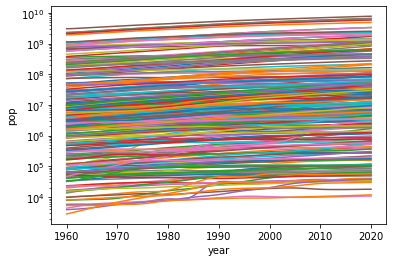

In [10]:
pop_df_clean.T.plot(legend=False, logy=True)
pl.xlabel('Year')
pl.ylabel('Population')

Fig. 1. The plot of population across time in different countries. On the x-axis, there is a time periods from 1960 to 2020, on y-axis - log-values of population. Different color lines correspond to 262 different countries. In general, we can see the overall trend of increasing population over time.

In [17]:
pop_df_clean.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [18]:
pop = preprocessing.scale(pop_df_clean, axis = 1) #standardizing the data
pop.shape #basically, the same data but presented in a different way

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


(262, 61)

In [19]:
pop.std(axis = 1) #preprocessing worked, hurray!

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

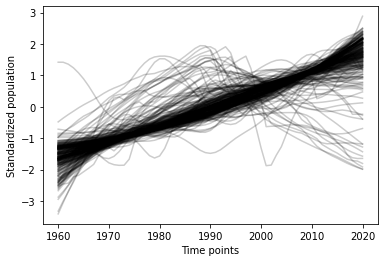

In [73]:
names = pop_df_clean.columns
positions = np.asarray([i for i in range(0, 61, 10)])
labels = ([names[i] for i in range(0, 61, 10)])
pl.plot(pop.T, 'k', alpha = 0.2)
pl.xlabel('Time points')
pl.ylabel('Standardized population')
pl.xticks(positions, labels);

Fig. 2. The plot of population trends over time. On x-axis, there are time point from 1990 to 2020, on y-axis - standardized population numbers. Each line corresponds to one of the countries. Mostly, there is a trend of increasing population, but for certain countries we can see specific veriability.

# Clustering. K-means

Clustering the population data with k-means method. As the number of clusters, we went with 4 (just why not). 

In [76]:
 k_clusters = cluster.k_means(pop, 4) 

In [86]:
k_clusters[0].shape #centoids: 4 clusters, 61 features

(4, 61)

In [82]:
k_clusters[1].shape #each position is a country, each value - the cluster this country belongs to

(262,)

**Cluster 1**

The size of the cluster 1: 116


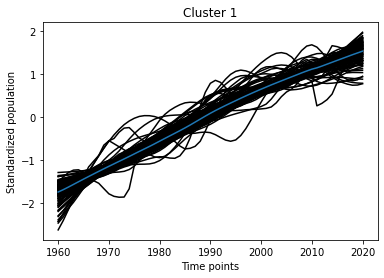

In [173]:
pl.plot(pop[k_clusters[1]==0].T, 'k')
pl.xlabel('Time points')
pl.ylabel('Standardized population')
pl.title('Cluster 1')
pl.xticks(positions, labels);
pl.plot(k_clusters[0][0].T) #cluster centroid
print('The size of the cluster 1:', (k_clusters[1]==0).sum())

Fig. 3. The plot of k-means cluster 1 over time. The blue line stands for the cluster centroid, basically, the multi-dimensional average of the cluster. For 116 counties in this cluster, there is a gradual rising trend over time. 

**Cluster 2**

The size of the cluster 3: 10


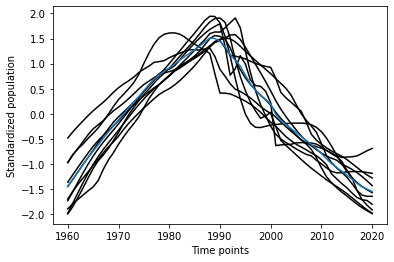

In [94]:
pl.plot(pop[k_clusters[1]==1].T, 'k')
pl.xlabel('Time points')
pl.ylabel('Standardized population')
pl.title('Cluster 2')
pl.xticks(positions, labels);
pl.plot(k_clusters[0][1].T) #cluster centroid
print('The size of the cluster 2:', (k_clusters[1]==1).sum())

Fig. 4. The plot of k-means cluster 2 over time. The blue line stands for the cluster centroid. For 10 counties in this cluster, there is a gradual rising trend until approxinately 90s and then gradual decline in the population.

In [113]:
#Checking what countries are in cluster 2
cluster2 = []
for i, x in enumerate(k_clusters[1]):
  if x == 1:
    cluster2.append(pop_df_clean.index.values[i])
cluster2

['Bulgaria',
 'Bosnia and Herzegovina',
 'Estonia',
 'Georgia',
 'Croatia',
 'Hungary',
 'Lithuania',
 'Latvia',
 'Romania',
 'Ukraine']

As we can see, the cluster 2 consists of eastern European countries. This trend could be explained by the fact that all of this countries decrealed independence around 90s. So, the change could be connected to the different way of calculationg the population or the migration of population. Additionally, in Hungary around 90s there was a civil war that could've contributed to the drop in the population. Overall small values at the beginning of the time period around 1960 could be the consequences of war, so the rising trend before 1990 could be explained by the after war growth and recovery of countries after WW2.

**Cluster 3**

The size of the cluster 3: 26


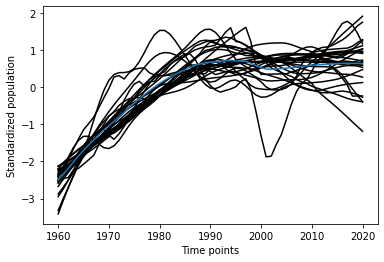

In [93]:
pl.plot(pop[k_clusters[1]==2].T, 'k')
pl.xlabel('Time points')
pl.ylabel('Standardized population')
pl.title('Cluster 3')
pl.xticks(positions, labels);
pl.plot(k_clusters[0][2].T) #cluster centroid
print('The size of the cluster 3:', (k_clusters[1]==2).sum())

Fig. 5. The plot of k-means cluster 3 over time. The blue line stands for the cluster centroid. For 26 counties in this cluster, there is a gradual rising trend until approxinately 90s and then a plato in population number. We also can see a drop in the population around 2000s for one of the countries. 

In [171]:
#Checking what countries are in cluster 3
cluster3 = []
for i, x in enumerate(k_clusters[1]):
  if x == 2:
    cluster3.append(pop_df_clean.index.values[i])
cluster3

['Albania',
 'Armenia',
 'Belarus',
 'Central Europe and the Baltics',
 'Cuba',
 'Curacao',
 'Czech Republic',
 'Dominica',
 'Faroe Islands',
 'Greenland',
 'Guyana',
 'Japan',
 'Kazakhstan',
 'Moldova',
 'North Macedonia',
 'Montenegro',
 'Poland',
 'Puerto Rico',
 'Russian Federation',
 'Serbia',
 'Slovak Republic',
 'Slovenia',
 'Tonga',
 'St. Vincent and the Grenadines',
 'Virgin Islands (U.S.)',
 'Kosovo']

This is a really diverse group of countries. There are some easter European and post-soviet ones that also established their independece around 90s. In Serbia, Montenegro, and Kosovo, there was a war closer to the end of 90s which could've contributed to the stop of rising trend in population. There are also some Carribean countries that gained their independence around 90s. Surprisingly, it didn't lead to the same pattern of decline like in cluster 2. Other explanations could be (based on what I know about Russia) that there was a change in traditional views and economic situation that could've led to the overall plato in population and trend to have more nuclear families then before. For instance, in Russia, the demographic crisis is persisting since around 90s. I would imagine that similar situation is also observed in other countries.

In [172]:
drop_find = pop[k_clusters[1]==2][:,41] 
for i, x in enumerate(drop_find):
  if x == min(drop_find):
    print(cluster3[i])

Curacao


The drop for one of the countries is approximately around 2000. It's 41st position in pop df. 'Drop_find' is the population values for all the countries in cluster 3 for 2000. Then I found the minimum one and what country out of cluster it coresponded to. It tuned out to be Curacao. According to Wikipedia, there was a stagnation in economy before 90s and it resulted in huge migration in 90s and 2000s to Netherlands. Then in 2007-8 it has become a part of the Kingdom of Netherlands.  

**Cluster 4**

The size of the cluster 4: 110


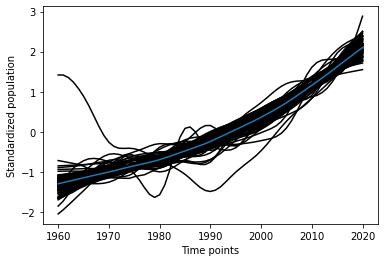

In [97]:
pl.plot(pop[k_clusters[1]==3].T, 'k')
pl.xlabel('Time points')
pl.ylabel('Standardized population')
pl.title('Cluster 4')
pl.xticks(positions, labels);
pl.plot(k_clusters[0][3].T) #cluster centroid
print('The size of the cluster 4:', (k_clusters[1]==3).sum())

Fig. 6. The plot of k-means cluster 4 over time. The blue line stands for the cluster centroid. For 110 counties in this cluster, there is a gradual rising trend in population. The pattern is different from cluster 1 as here is more gradual rise with more like a plato through 60s to 90s. 

In [327]:
cluster4 = []
for i, x in enumerate(k_clusters[1]):
  if x == 3:
    cluster4.append(pop_df_clean.index.values[i])

In [329]:
rise_find = pop[k_clusters[1]==3][:,1] 
for i, x in enumerate(rise_find):
  if x == max(rise_find):
    print(cluster4[i])

St. Kitts and Nevis


There is an interesting large population value for one of the countries in 1960s compared to other members of cluster. Could be explained that around that time it regained autonomy from Britain.

**Plotting intra-cluster variance**

In [316]:
intra_var = []
for n in range(2, 11):
  cluster_var = 0
  cluster_n = cluster.k_means(pop, n)
  for i in range(0, n):
    cluster_mean = np.mean(pop[cluster_n[1] == i], axis = 0)
    within_cluster_var = np.sum((pop[cluster_n[1] == i] - cluster_mean)**2)
    cluster_var += within_cluster_var
  intra_var.append(np.sum(cluster_var))              

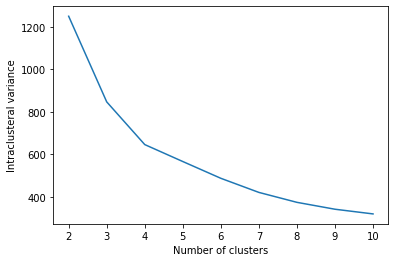

In [330]:
pl.plot((range(2,11)), intra_var)
pl.xlabel('Number of clusters')
pl.ylabel('Intraclusteral variance');

Fig. 7. The 'elbow' plot of explained intra clusteral variance as a function of the number of clusters. On the x-axis, there is a number of clusters, and on y-axis, the inctra clusteral variance calculated for k-means clusters. The greater the number of clusters, the smaller the variance. The 'elbow' of the curve could correcpond to 4 clusters used for k-means clustering, as with the increase of the number of clusters, the variance doesn't seem to significantly change as before. So, the appropriate number of clusters used for clustering might be 4 as it allows the explanation of most of the data variation.